In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

from numpy.random import seed
import tensorflow as tf

from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from keras.models import Model, load_model
from keras import regularizers

In [ ]:
df = pd.read_csv('output.csv')
df.head()

,Timestamp,2024-05-18 07:50:53.478341+00:00,2024-05-18 07:51:53.478341+00:00,2024-05-18 07:52:53.478341+00:00,2024-05-18 07:53:53.478341+00:00,2024-05-18 07:54:53.478341+00:00,2024-05-18 07:55:53.478341+00:00,2024-05-18 07:56:53.478341+00:00,2024-05-18 07:57:53.478341+00:00,2024-05-18 07:58:53.478341+00:00,...,2024-05-18 08:11:53.478341+00:00,2024-05-18 08:12:53.478341+00:00,2024-05-18 08:13:53.478341+00:00,2024-05-18 08:14:53.478341+00:00,2024-05-18 08:15:53.478341+00:00,2024-05-18 08:16:53.478341+00:00,2024-05-18 08:17:53.478341+00:00,2024-05-18 08:18:53.478341+00:00,2024-05-18 08:19:53.478341+00:00,2024-05-18 08:20:53.478341+00:00
0,app_CPU,0.259189,0.278856,0.311644,0.246555,0.286779,0.384673,0.334086,0.232462,0.833944,...,0.379872,0.268275,0.309657,0.353316,0.242583,0.280084,0.896758,31.696832,0.315402,0.314641
1,cadvisor_CPU,5.203624,4.887468,4.641002,4.854648,4.913098,5.126255,4.780699,4.858457,5.004187,...,4.583729,5.077798,5.082404,4.944892,4.939251,4.965448,4.806226,5.181390,4.677540,4.878537
2,nginx_CPU,0.000000,0.001982,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.006024,0.000000,0.000000,0.000000,1.367617,0.000000,0.000000
3,postgres_CPU,0.035952,0.034396,0.041933,0.041876,0.047005,0.040706,0.030200,0.041755,0.032249,...,0.041414,0.036039,0.045272,0.056891,0.037714,0.037579,0.187930,3.393330,0.047794,0.043758
4,app_Net_received,11.685755,28.728740,11.094876,10.824245,139.566297,11.837216,131.537277,11.796159,147.546329,...,147.587137,11.930863,140.283307,30.332452,11.772079,149.169095,185.655939,955719.684402,11.900640,11.181875


In [ ]:
df = df.T
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Timestamp,app_CPU,cadvisor_CPU,nginx_CPU,postgres_CPU,app_Net_received,cadvisor_Net_received,nginx_Net_received,postgres_Net_received,app_Net_sent,cadvisor_Net_sent,nginx_Net_sent,postgres_Net_sent,app_RAM,cadvisor_RAM,nginx_RAM,postgres_RAM
2024-05-18 07:50:53.478341+00:00,0.259189,5.203624,0.0,0.035952,11.685755,213.930445,0.0,0.0,11.363636,7240.710761,0.0,0.0,309321728.0,49065984.0,3198976.0,16375808.0
2024-05-18 07:51:53.478341+00:00,0.278856,4.887468,0.001982,0.034396,28.72874,220.41143,9.969246,0.0,44.174299,7426.199094,12.630015,0.0,309321728.0,46411776.0,3203072.0,16375808.0
2024-05-18 07:52:53.478341+00:00,0.311644,4.641002,0.0,0.041933,11.094876,214.953114,0.0,0.0,10.789044,7504.116231,0.0,0.0,309334016.0,46563328.0,3203072.0,16375808.0
2024-05-18 07:53:53.478341+00:00,0.246555,4.854648,0.0,0.041876,10.824245,210.239274,0.0,0.0,10.481826,7136.255721,0.0,0.0,309338112.0,48136192.0,3203072.0,16375808.0
2024-05-18 07:54:53.478341+00:00,0.286779,4.913098,0.0,0.047005,139.566297,211.099696,0.0,0.0,46.783732,7180.412896,0.0,0.0,309338112.0,49270784.0,3203072.0,16375808.0
2024-05-18 07:55:53.478341+00:00,0.384673,5.126255,0.0,0.040706,11.837216,223.129145,0.0,0.0,11.510922,7303.437586,0.0,0.0,309338112.0,47108096.0,3203072.0,16375808.0
2024-05-18 07:56:53.478341+00:00,0.334086,4.780699,0.0,0.0302,131.537277,223.551939,0.0,0.0,44.122593,7523.493022,0.0,0.0,309350400.0,48136192.0,3203072.0,16375808.0
2024-05-18 07:57:53.478341+00:00,0.232462,4.858457,0.0,0.041755,11.796159,216.349858,0.0,0.0,11.470997,7318.630525,0.0,0.0,309350400.0,46174208.0,3203072.0,16375808.0
2024-05-18 07:58:53.478341+00:00,0.833944,5.004187,0.0,0.032249,147.546329,236.671001,0.0,0.0,56.409978,7507.536768,0.0,0.0,309354496.0,46673920.0,3203072.0,16375808.0


In [ ]:
shape = df.shape
params_count = list(shape)[1]
columns = [df.iloc[0, i] for i in range(params_count)]
df.columns = columns
df

,app_CPU,cadvisor_CPU,nginx_CPU,postgres_CPU,app_Net_received,cadvisor_Net_received,nginx_Net_received,postgres_Net_received,app_Net_sent,cadvisor_Net_sent,nginx_Net_sent,postgres_Net_sent,app_RAM,cadvisor_RAM,nginx_RAM,postgres_RAM
Timestamp,app_CPU,cadvisor_CPU,nginx_CPU,postgres_CPU,app_Net_received,cadvisor_Net_received,nginx_Net_received,postgres_Net_received,app_Net_sent,cadvisor_Net_sent,nginx_Net_sent,postgres_Net_sent,app_RAM,cadvisor_RAM,nginx_RAM,postgres_RAM
2024-05-18 07:50:53.478341+00:00,0.259189,5.203624,0.0,0.035952,11.685755,213.930445,0.0,0.0,11.363636,7240.710761,0.0,0.0,309321728.0,49065984.0,3198976.0,16375808.0
2024-05-18 07:51:53.478341+00:00,0.278856,4.887468,0.001982,0.034396,28.72874,220.41143,9.969246,0.0,44.174299,7426.199094,12.630015,0.0,309321728.0,46411776.0,3203072.0,16375808.0
2024-05-18 07:52:53.478341+00:00,0.311644,4.641002,0.0,0.041933,11.094876,214.953114,0.0,0.0,10.789044,7504.116231,0.0,0.0,309334016.0,46563328.0,3203072.0,16375808.0
2024-05-18 07:53:53.478341+00:00,0.246555,4.854648,0.0,0.041876,10.824245,210.239274,0.0,0.0,10.481826,7136.255721,0.0,0.0,309338112.0,48136192.0,3203072.0,16375808.0
2024-05-18 07:54:53.478341+00:00,0.286779,4.913098,0.0,0.047005,139.566297,211.099696,0.0,0.0,46.783732,7180.412896,0.0,0.0,309338112.0,49270784.0,3203072.0,16375808.0
2024-05-18 07:55:53.478341+00:00,0.384673,5.126255,0.0,0.040706,11.837216,223.129145,0.0,0.0,11.510922,7303.437586,0.0,0.0,309338112.0,47108096.0,3203072.0,16375808.0
2024-05-18 07:56:53.478341+00:00,0.334086,4.780699,0.0,0.0302,131.537277,223.551939,0.0,0.0,44.122593,7523.493022,0.0,0.0,309350400.0,48136192.0,3203072.0,16375808.0
2024-05-18 07:57:53.478341+00:00,0.232462,4.858457,0.0,0.041755,11.796159,216.349858,0.0,0.0,11.470997,7318.630525,0.0,0.0,309350400.0,46174208.0,3203072.0,16375808.0
2024-05-18 07:58:53.478341+00:00,0.833944,5.004187,0.0,0.032249,147.546329,236.671001,0.0,0.0,56.409978,7507.536768,0.0,0.0,309354496.0,46673920.0,3203072.0,16375808.0


In [ ]:
df.drop(index='Timestamp', inplace=True)
df

,app_CPU,cadvisor_CPU,nginx_CPU,postgres_CPU,app_Net_received,cadvisor_Net_received,nginx_Net_received,postgres_Net_received,app_Net_sent,cadvisor_Net_sent,nginx_Net_sent,postgres_Net_sent,app_RAM,cadvisor_RAM,nginx_RAM,postgres_RAM
2024-05-18 07:50:53.478341+00:00,0.259189,5.203624,0.0,0.035952,11.685755,213.930445,0.0,0.0,11.363636,7240.710761,0.0,0.0,309321728.0,49065984.0,3198976.0,16375808.0
2024-05-18 07:51:53.478341+00:00,0.278856,4.887468,0.001982,0.034396,28.72874,220.41143,9.969246,0.0,44.174299,7426.199094,12.630015,0.0,309321728.0,46411776.0,3203072.0,16375808.0
2024-05-18 07:52:53.478341+00:00,0.311644,4.641002,0.0,0.041933,11.094876,214.953114,0.0,0.0,10.789044,7504.116231,0.0,0.0,309334016.0,46563328.0,3203072.0,16375808.0
2024-05-18 07:53:53.478341+00:00,0.246555,4.854648,0.0,0.041876,10.824245,210.239274,0.0,0.0,10.481826,7136.255721,0.0,0.0,309338112.0,48136192.0,3203072.0,16375808.0
2024-05-18 07:54:53.478341+00:00,0.286779,4.913098,0.0,0.047005,139.566297,211.099696,0.0,0.0,46.783732,7180.412896,0.0,0.0,309338112.0,49270784.0,3203072.0,16375808.0
2024-05-18 07:55:53.478341+00:00,0.384673,5.126255,0.0,0.040706,11.837216,223.129145,0.0,0.0,11.510922,7303.437586,0.0,0.0,309338112.0,47108096.0,3203072.0,16375808.0
2024-05-18 07:56:53.478341+00:00,0.334086,4.780699,0.0,0.0302,131.537277,223.551939,0.0,0.0,44.122593,7523.493022,0.0,0.0,309350400.0,48136192.0,3203072.0,16375808.0
2024-05-18 07:57:53.478341+00:00,0.232462,4.858457,0.0,0.041755,11.796159,216.349858,0.0,0.0,11.470997,7318.630525,0.0,0.0,309350400.0,46174208.0,3203072.0,16375808.0
2024-05-18 07:58:53.478341+00:00,0.833944,5.004187,0.0,0.032249,147.546329,236.671001,0.0,0.0,56.409978,7507.536768,0.0,0.0,309354496.0,46673920.0,3203072.0,16375808.0
2024-05-18 07:59:53.478341+00:00,0.457374,4.983567,0.0,0.041549,138.364316,222.214757,0.0,0.0,46.004753,7496.145254,0.0,0.0,309358592.0,42610688.0,3203072.0,16375808.0


In [ ]:
def _process(x):
  return float(x)

In [ ]:
for i in df.columns:
  df[i] = df[i].apply(lambda x: _process(x))

In [ ]:
df

,app_CPU,cadvisor_CPU,nginx_CPU,postgres_CPU,app_Net_received,cadvisor_Net_received,nginx_Net_received,postgres_Net_received,app_Net_sent,cadvisor_Net_sent,nginx_Net_sent,postgres_Net_sent,app_RAM,cadvisor_RAM,nginx_RAM,postgres_RAM
2024-05-18 07:50:53.478341+00:00,0.259189,5.203624,0.000000,0.035952,11.685755,213.930445,0.000000,0.000000,11.363636,7240.710761,0.000000,0.000000,309321728.0,49065984.0,3198976.0,16375808.0
2024-05-18 07:51:53.478341+00:00,0.278856,4.887468,0.001982,0.034396,28.728740,220.411430,9.969246,0.000000,44.174299,7426.199094,12.630015,0.000000,309321728.0,46411776.0,3203072.0,16375808.0
2024-05-18 07:52:53.478341+00:00,0.311644,4.641002,0.000000,0.041933,11.094876,214.953114,0.000000,0.000000,10.789044,7504.116231,0.000000,0.000000,309334016.0,46563328.0,3203072.0,16375808.0
2024-05-18 07:53:53.478341+00:00,0.246555,4.854648,0.000000,0.041876,10.824245,210.239274,0.000000,0.000000,10.481826,7136.255721,0.000000,0.000000,309338112.0,48136192.0,3203072.0,16375808.0
2024-05-18 07:54:53.478341+00:00,0.286779,4.913098,0.000000,0.047005,139.566297,211.099696,0.000000,0.000000,46.783732,7180.412896,0.000000,0.000000,309338112.0,49270784.0,3203072.0,16375808.0
2024-05-18 07:55:53.478341+00:00,0.384673,5.126255,0.000000,0.040706,11.837216,223.129145,0.000000,0.000000,11.510922,7303.437586,0.000000,0.000000,309338112.0,47108096.0,3203072.0,16375808.0
2024-05-18 07:56:53.478341+00:00,0.334086,4.780699,0.000000,0.030200,131.537277,223.551939,0.000000,0.000000,44.122593,7523.493022,0.000000,0.000000,309350400.0,48136192.0,3203072.0,16375808.0
2024-05-18 07:57:53.478341+00:00,0.232462,4.858457,0.000000,0.041755,11.796159,216.349858,0.000000,0.000000,11.470997,7318.630525,0.000000,0.000000,309350400.0,46174208.0,3203072.0,16375808.0
2024-05-18 07:58:53.478341+00:00,0.833944,5.004187,0.000000,0.032249,147.546329,236.671001,0.000000,0.000000,56.409978,7507.536768,0.000000,0.000000,309354496.0,46673920.0,3203072.0,16375808.0
2024-05-18 07:59:53.478341+00:00,0.457374,4.983567,0.000000,0.041549,138.364316,222.214757,0.000000,0.000000,46.004753,7496.145254,0.000000,0.000000,309358592.0,42610688.0,3203072.0,16375808.0


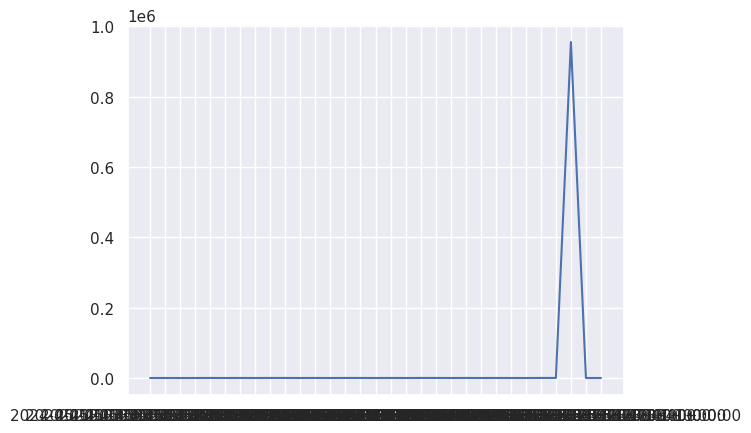

In [ ]:
plt.plot(df.app_Net_received)

In [ ]:
train = df[:int(len(df)*0.8)]
test = df[int(len(df)*0.8):]
print("Training dataset shape:", train.shape)
print("Test dataset shape:", test.shape)

Training dataset shape: (24, 16)
Test dataset shape: (7, 16)


In [ ]:
train = train.app_CPU.values
test = test.app_CPU.values

In [ ]:
X_train = []
X_test = []

for i in range(len(train) - 3):
  X_train.append(train[i: i+3])
for i in range(len(test) - 3):
  X_test.append(test[i: i+3])

X_train = np.array(X_train)
X_test = np.array(X_test)

In [ ]:
X_train

array([[0.25918933, 0.27885594, 0.31164367],
       [0.27885594, 0.31164367, 0.24655499],
       [0.31164367, 0.24655499, 0.28677899],
       [0.24655499, 0.28677899, 0.38467325],
       [0.28677899, 0.38467325, 0.33408595],
       [0.38467325, 0.33408595, 0.23246202],
       [0.33408595, 0.23246202, 0.83394381],
       [0.23246202, 0.83394381, 0.45737421],
       [0.83394381, 0.45737421, 0.23349002],
       [0.45737421, 0.23349002, 0.26958048],
       [0.23349002, 0.26958048, 0.23179141],
       [0.26958048, 0.23179141, 0.27220599],
       [0.23179141, 0.27220599, 0.32232414],
       [0.27220599, 0.32232414, 0.2654945 ],
       [0.32232414, 0.2654945 , 0.34730385],
       [0.2654945 , 0.34730385, 0.24711988],
       [0.34730385, 0.24711988, 0.37036795],
       [0.24711988, 0.37036795, 0.33674192],
       [0.37036795, 0.33674192, 0.23176649],
       [0.33674192, 0.23176649, 0.37987232],
       [0.23176649, 0.37987232, 0.2682745 ]])

In [ ]:
X_train.shape

(21, 3)

In [ ]:
# define the autoencoder network model
def autoencoder_model(X):
    inputs = Input(shape=(3, 1))
    L1 = LSTM(16, activation='relu', return_sequences=True,
              kernel_regularizer=regularizers.l2(0.00))(inputs)
    L2 = LSTM(4, activation='relu', return_sequences=False)(L1)
    L3 = RepeatVector(3)(L2)
    L4 = LSTM(4, activation='relu', return_sequences=True)(L3)
    L5 = LSTM(16, activation='relu', return_sequences=True)(L4)
    output = TimeDistributed(Dense(1))(L5)
    model = Model(inputs=inputs, outputs=output)
    return model

In [ ]:
model = autoencoder_model(X_train)
model.compile(optimizer='adam', loss='mae')
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3, 1)]            0         
                                                                 
 lstm (LSTM)                 (None, 3, 16)             1152      
                                                                 
 lstm_1 (LSTM)               (None, 4)                 336       
                                                                 
 repeat_vector (RepeatVecto  (None, 3, 4)              0         
 r)                                                              
                                                                 
 lstm_2 (LSTM)               (None, 3, 4)              144       
                                                                 
 lstm_3 (LSTM)               (None, 3, 16)             1344      
                                                             

In [ ]:
nb_epochs = 100
batch_size = 10
history = model.fit(X_train, X_train, epochs=nb_epochs, batch_size=batch_size, validation_split=0.05).history

Epoch 1/100
2/2 [==============================] - 6s 719ms/step - loss: 0.3268 - val_loss: 0.3014
Epoch 2/100
2/2 [==============================] - 0s 44ms/step - loss: 0.3233 - val_loss: 0.2979
Epoch 3/100
2/2 [==============================] - 0s 38ms/step - loss: 0.3198 - val_loss: 0.2944
Epoch 4/100
2/2 [==============================] - 0s 40ms/step - loss: 0.3162 - val_loss: 0.2907
Epoch 5/100
2/2 [==============================] - 0s 37ms/step - loss: 0.3126 - val_loss: 0.2870
Epoch 6/100
2/2 [==============================] - 0s 37ms/step - loss: 0.3089 - val_loss: 0.2833
Epoch 7/100
2/2 [==============================] - 0s 38ms/step - loss: 0.3051 - val_loss: 0.2795
Epoch 8/100
2/2 [==============================] - 0s 39ms/step - loss: 0.3013 - val_loss: 0.2756
Epoch 9/100
2/2 [==============================] - 0s 55ms/step - loss: 0.2974 - val_loss: 0.2717
Epoch 10/100
2/2 [==============================] - 0s 38ms/step - loss: 0.2935 - val_loss: 0.2677
Epoch 11/100
2/2 [

In [ ]:
model.save("model.keras")
print("Model saved")

Model saved
